In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import matplotlib.gridspec as gridspec

In [38]:
#display video
# i=0

while(True):
    
    ret, frame = cap.read()
    
    if not ret:
        break
   
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',frame - frame_prev)
#     print(i)
#     i=i+1
    frame_prev = frame
    if cv2.waitKey(10000) & 0xFF == ord('q'):
        break

        cap.release()
cv2.destroyAllWindows()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


KeyboardInterrupt: 

In [25]:
cap = cv2.VideoCapture('bcd.mp4')
cap2 = cv2.VideoCapture('abc.mp4')

431421627


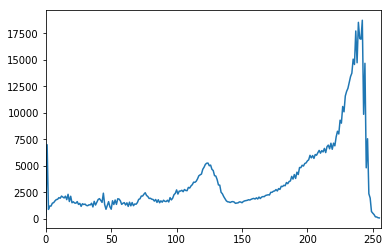

In [26]:
#difference between consecutive video frames 
_, frame1 = cap.read()
_, frame2 = cap2.read()

# cv2.imshow('frame1',frame1)
# cv2.imshow('frame2',frame2)

#gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
#gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

f = frame1 - frame2
print(f.sum())
cv2.imshow('frame',f)
cv2.waitKey(0)

cap.release()
cv2.destroyAllWindows()

histr = cv2.calcHist([f],[0],None,[256],[0,256])
plt.plot(histr)
plt.xlim([0,256])
plt.show()


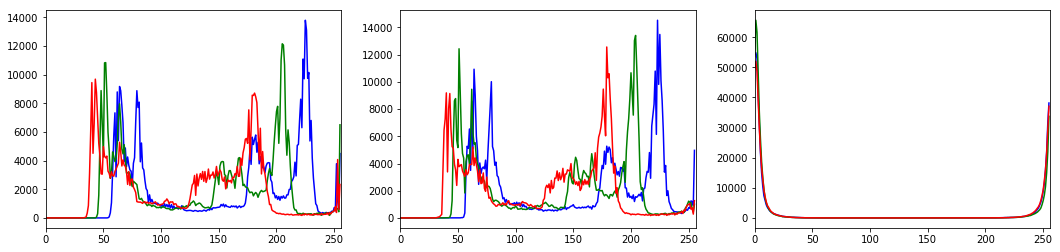

In [54]:
#cap = cv2.VideoCapture('v_CliffDiving_g01_c02.avi')
#histogram of consecutive frames and their differences
cap = cv2.VideoCapture('D:\\meais\\Documents\\Research\\meais-sf\\youtube-8m-videos-frames-master\\t5\\t\\yatch.avi')
cap2 = cv2.VideoCapture('D:\\meais\\Documents\\Research\\meais-sf\\youtube-8m-videos-frames-master\\t5\\pred\\yatch.avi')


for i in range(8):
    _, frame1 = cap.read()
    _, frame2 = cap2.read()


    
fig = plt.figure(figsize=(18, 4))

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([frame1],[i],None,[256],[0,256])
    fig.add_subplot(1, 3, 1)
    plt.plot(histr,color = col)
    plt.xlim([0,256])
# plt.show()


for i,col in enumerate(color):
    histr = cv2.calcHist([frame2],[i],None,[256],[0,256])
    fig.add_subplot(1, 3, 2)
    plt.plot(histr,color = col)
    plt.xlim([0,256])
# plt.show()


f = frame1 - frame2
# cv2.imshow('frame',f)
for i,col in enumerate(color):
    histr = cv2.calcHist([f],[i],None,[256],[0,256])
    fig.add_subplot(1, 3, 3)
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

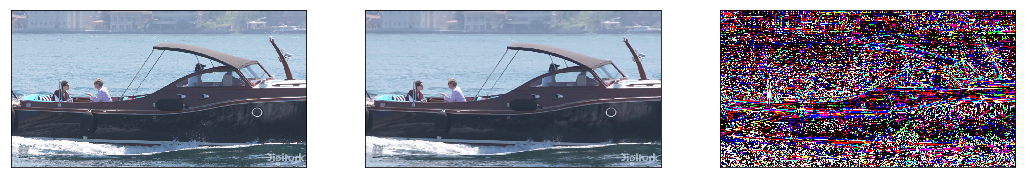

In [55]:
def preprocess(X):
    b = np.empty(X.shape)
    b[:, :,2] = X[:, :,0]
    b[:, :,1] = X[:, :,1]
    b[:, :,0] = X[:, :,2]
    return b.astype(np.float32) / 255 
    
frame1 = preprocess(frame1)
frame2 = preprocess(frame2)
f = preprocess(f)
b1 = np.empty(frame1.shape)
b2 = np.empty(frame1.shape)
b = np.empty(f.shape)

b1[:, :,2] = frame1[:, :,0]
b1[:, :,1] = frame1[:, :,1]
b1[:, :,0] = frame1[:, :,2]


b2[:, :,2] = frame2[:, :,0]
b2[:, :,1] = frame2[:, :,1]
b2[:, :,0] = frame2[:, :,2]



   
fig2 = plt.figure(figsize=(18, 4))

fig2.add_subplot(1, 3, 1)
plt.imshow(b1)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
fig2.add_subplot(1, 3, 2)
plt.imshow(b2)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
fig2.add_subplot(1, 3, 3)
plt.imshow(b)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.show()

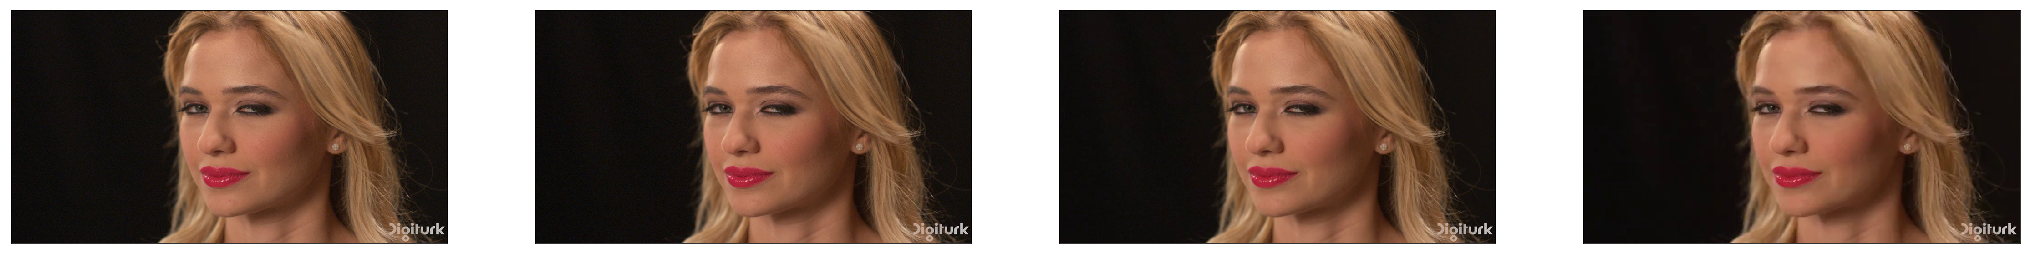

In [59]:
def preprocess(X):
    b = np.empty(X.shape)
    b[:, :,2] = X[:, :,0]
    b[:, :,1] = X[:, :,1]
    b[:, :,0] = X[:, :,2]
    return b.astype(np.float32) / 255 


orig = cv2.VideoCapture('D:\\meais\\Documents\\Research\\meais-sf\\youtube-8m-videos-frames-master\\t5\\t\\Beauty.avi')
pe = cv2.VideoCapture('D:\\meais\\Documents\\Research\\meais-sf\\youtube-8m-videos-frames-master\\t5\\predencoder\\Beauty.avi_11.avi')
h264 = cv2.VideoCapture('D:\\meais\\Documents\\Research\\meais-sf\\youtube-8m-videos-frames-master\\t5\\h264\\Beauty.avi_5.mp4')
mpeg4 = cv2.VideoCapture('D:\\meais\\Documents\\Research\\meais-sf\\youtube-8m-videos-frames-master\\t5\\mpeg4\\Beauty.avi_5.mp4')

_, frame1 = orig.read()
_, frame2 = h264.read()
_, frame3 = mpeg4.read()

for i in range(5):
    _, frame1 = orig.read()
    _, frame2 = h264.read()
    _, frame3 = mpeg4.read()
    _, frame4 = pe.read()

frame1 = preprocess(frame1)
frame2 = preprocess(frame2)
frame3 = preprocess(frame3)
frame4 = preprocess(frame4)

fig2 = plt.figure(figsize=(36, 6))
fig2.add_subplot(1, 4, 1)
plt.imshow(frame1)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
fig2.add_subplot(1, 4, 2)
plt.imshow(frame2)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
fig2.add_subplot(1, 4, 3)
plt.imshow(frame3)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
fig2.add_subplot(1, 4, 4)
plt.imshow(frame4)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.show()


In [4]:
from moviepy.editor import *


In [23]:
vidcap = VideoFileClip('D:\\meais\\Documents\\Research\\meais-sf\\youtube-8m-videos-frames-master\\data\\vcatgy2_52_2.mp4')
new_clip = vidcap.crop( x1 = 10 , y1 = 10 , width = 512, height = 512)
new_clip.write_videofile('D:\\meais\\Documents\\Research\\meais-sf\\youtube-8m-videos-frames-master\\data\\cropped_vmv31_1.mp4')

Moviepy - Building video D:\meais\Documents\Research\meais-sf\youtube-8m-videos-frames-master\data\cropped_vmv31_1.mp4.
Moviepy - Writing video D:\meais\Documents\Research\meais-sf\youtube-8m-videos-frames-master\data\cropped_vmv31_1.mp4



Moviepy - Done !
Moviepy - video ready D:\meais\Documents\Research\meais-sf\youtube-8m-videos-frames-master\data\cropped_vmv31_1.mp4


In [24]:
vidcap = cv2.VideoCapture('D:\\meais\\Documents\\Research\\meais-sf\\youtube-8m-videos-frames-master\\data\\cropped_vmv31_1.mp4')
success, frame1 = vidcap.read()
c = 0
color = ('b','g','r')

while success:
#     if c == 30:
#         break
#     c = c + 1
    success, frame2 = vidcap.read()
    
    if success:
        diff = frame2 - frame1

        print(diff.mean())
#         for i,col in enumerate(color):
#             histr = cv2.calcHist([diff],[i],None,[256],[0,256])
#             plt.plot(histr,color = col)
#             plt.xlim([0,256])
#             plt.show()  
        

        d_f = np.hstack((diff, frame1, frame2))

        cv2.imshow('difference_'+str(c),d_f)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    
    frame1 = frame2
    

99.03282292683919
101.8460324605306
95.78184382120769
106.56917826334636
99.80671310424805
101.55385971069336
98.54867299397786
117.24884796142578
101.07950083414714
104.21092478434245
97.28849538167317
107.77063115437825
94.82179133097331
96.29125340779622
86.35301462809245
106.5486946105957
93.30541483561198
109.07035700480144
95.33992513020833
107.84911473592122
104.98368835449219
110.44436899820964
96.09526824951172
113.72428131103516
109.66944758097331
100.00669225056966
100.85490290323894
110.25758616129558
91.2978032430013
104.82688013712566
118.72992833455403
103.415709177653
91.83732732137044
100.05855178833008
98.13790893554688
103.16206359863281
97.67119979858398
108.90584182739258
89.17116292317708
115.89999898274739
85.21934254964192
100.23026021321614
86.93860371907552
110.0497932434082
90.52897644042969
106.33271916707356
94.45449956258138
108.50557454427083
90.81388092041016
104.2670160929362
98.27672576904297
109.7037239074707
87.07328414916992
98.68800481160481
94.647

KeyboardInterrupt: 

In [21]:

parent = 'C:\\Users\\meais\\JNotebooks\\Video_Compression\\pytorch-image-comp-rnn-master\\Result_set\\4'
p1 = ['0','1','2','3','4']
p2 = ['diff_orig_0','diff_orig_1','diff_orig_2','diff_orig_3','diff_orig_4']
orig_arr = ''

for i in range(5):
    im1 = cv2.imread(os.path.join(parent, p1[i]+'.jpeg') )
    im2 = cv2.imread(os.path.join(parent, 'decoded_'+str(i)+'.jpeg'))
    
    im3 = cv2.imread(os.path.join(parent, 'diff_'+str(i)+'.jpeg'))
    im4 = cv2.imread(os.path.join(parent, 'diff_orig_'+str(i)+'.jpeg'))
    
    
    d_f = np.hstack((im1, im2, im3,im4))
    
    if i > 0:
        orig_arr= np.vstack((orig_arr, d_f))
    else:
        orig_arr = d_f
    
    cv2.imshow('Image', orig_arr)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#     cv2.imshow('frame', d_f)
#     